In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

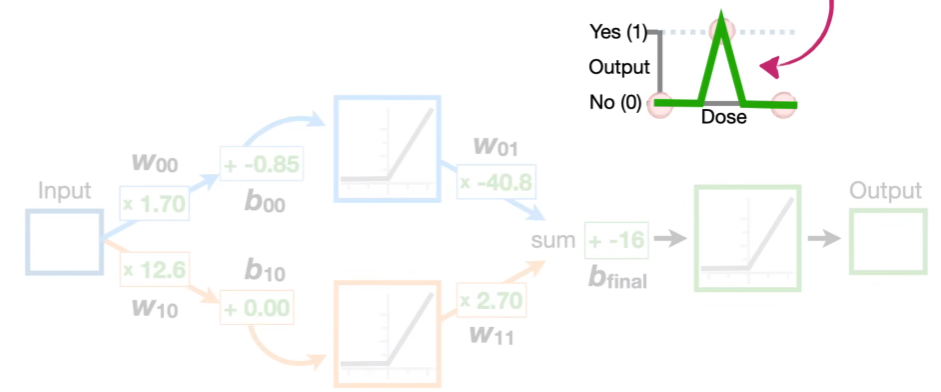

In [62]:
class basic_NN(nn.Module):

    def __init__(self):
        super().__init__()
        # Definir les params
        self.w00 = nn.Parameter(torch.tensor([1.7], requires_grad=False))
        self.b00 = nn.Parameter(torch.tensor([-0.85], requires_grad=False))
        self.w10 = nn.Parameter(torch.tensor([12.6], requires_grad=False))
        self.b10 = nn.Parameter(torch.tensor([0.0], requires_grad=False))
        self.w01 = nn.Parameter(torch.tensor([-40.8], requires_grad=False))
        self.w11 = nn.Parameter(torch.tensor([2.7], requires_grad=False))
        self.bfinal = nn.Parameter(torch.tensor([-16.0], requires_grad=False))

    def forward(self, input):
        # la partie haute
        input_to_top_relu = input*self.w00 + self.b00
        applied_top_relu = F.relu(input_to_top_relu)
        top_relu_to_output = applied_top_relu*self.w01

        # la partie bas
        input_to_bottom_relu = input*self.w10 + self.b10
        applied_bottom_relu = F.relu(input_to_bottom_relu)
        bottom_relu_to_output = applied_bottom_relu*self.w11

        # output finale
        sum_diff_output = top_relu_to_output + bottom_relu_to_output
        add_bias = sum_diff_output + self.bfinal
        output = F.relu(add_bias)
        return output



In [63]:
# tester ma classe
input = torch.linspace(0, 1, 11)
input

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [64]:
model = basic_NN()
outputs = model(input)
print(outputs)

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000], grad_fn=<ReluBackward0>)


### Let's assume that we don't know the value of bfinal, and try to estimate the exact value with backpropagation

In [65]:
class basic_trainable_NN(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor([1.7], requires_grad=False))
        self.b00 = nn.Parameter(torch.tensor([-0.85], requires_grad=False))
        self.w10 = nn.Parameter(torch.tensor([12.6], requires_grad=False))
        self.b10 = nn.Parameter(torch.tensor([0.0], requires_grad=False))
        self.w01 = nn.Parameter(torch.tensor([-40.8], requires_grad=False))
        self.w11 = nn.Parameter(torch.tensor([2.7], requires_grad=False))
        self.bfinal = nn.Parameter(torch.tensor([0.0], requires_grad=True))

    def forward(self, input):
        # la partie haute
        input_to_top_relu = input*self.w00 + self.b00
        applied_top_relu = F.relu(input_to_top_relu)
        top_relu_to_output = applied_top_relu*self.w01

        # la partie bas
        input_to_bottom_relu = input*self.w10 + self.b10
        applied_bottom_relu = F.relu(input_to_bottom_relu)
        bottom_relu_to_output = applied_bottom_relu*self.w11

        # output finale
        sum_diff_output = top_relu_to_output + bottom_relu_to_output
        add_bias = sum_diff_output + self.bfinal
        output = F.relu(add_bias)
        return output


In [67]:
#input_data = torch.tensor([0., 0.5, 1.])
#labels = torch.tensor([0., 1., 0.])

input_data = torch.tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])
labels = torch.tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])


# define model and optimizer and loss function
model = basic_trainable_NN()
optimizer = SGD(model.parameters(), lr=0.1)

print(f"Final bias, before optimisation: {str(model.bfinal.data)}")

for epoch in range(100):

    total_loss = 0

    for iteration in range(len(input_data)):
        labeled_i = labels[iteration]
        output_i = model(input_data[iteration])
        loss = (output_i - labeled_i)**2
        loss.backward()
        total_loss += float(loss)

    if abs(total_loss)<0.001:
        print(f"num steps: {str(epoch)}")
        break

    optimizer.step()
    optimizer.zero_grad()

    print(f"Num step: {str(epoch)}, final bias value is: {str(model.bfinal.data)}")

Final bias, before optimisation: tensor([0.])
Num step: 0, final bias value is: tensor([-16.5440])
Num step: 1, final bias value is: tensor([-16.5440])
Num step: 2, final bias value is: tensor([-16.5440])
Num step: 3, final bias value is: tensor([-16.5440])
Num step: 4, final bias value is: tensor([-16.5440])
Num step: 5, final bias value is: tensor([-16.5440])
Num step: 6, final bias value is: tensor([-16.5440])
Num step: 7, final bias value is: tensor([-16.5440])
Num step: 8, final bias value is: tensor([-16.5440])
Num step: 9, final bias value is: tensor([-16.5440])
Num step: 10, final bias value is: tensor([-16.5440])
Num step: 11, final bias value is: tensor([-16.5440])
Num step: 12, final bias value is: tensor([-16.5440])
Num step: 13, final bias value is: tensor([-16.5440])
Num step: 14, final bias value is: tensor([-16.5440])
Num step: 15, final bias value is: tensor([-16.5440])
Num step: 16, final bias value is: tensor([-16.5440])
Num step: 17, final bias value is: tensor([-16